In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,3)
os.getcwd()

'/Users/tom/Dropbox/Mac (2)/Desktop/UNSW/y4/t3/ECON3203/a1'

In [3]:
atm = pd.read_csv('./ATM_sample.csv')
atm.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127


In [4]:
atm.corr()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
Shops,1.000000,0.872903,0.999131,0.013014,0.000004,0.001820,0.985797
ATMs,0.872903,1.000000,0.873726,0.009766,-0.003306,-0.002616,0.824030
Downtown,0.999131,0.873726,1.000000,0.012664,-0.000101,0.001782,0.983574
Weekday,0.013014,0.009766,0.012664,1.000000,-0.007153,-0.006793,-0.050470
Center,0.000004,-0.003306,-0.000101,-0.007153,1.000000,0.010521,0.088103
High,0.001820,-0.002616,0.001782,-0.006793,0.010521,1.000000,0.021275
Withdraw,0.985797,0.824030,0.983574,-0.050470,0.088103,0.021275,1.000000


In [5]:
testingDowntown = atm.sort_values(by='Shops').reset_index()
testingDowntown['Match'] = testingDowntown['Downtown'].eq(testingDowntown['Downtown'].shift())
testingDowntown[~testingDowntown['Match']]
testingDowntown.iloc[6553:6558]

,index,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Match
6553,21045,117,3,0,1,0,0,15.956201,True
6554,21300,117,4,0,0,1,0,21.573735,True
6555,18440,118,4,0,0,0,0,17.401981,True
6556,15387,922,8,1,0,0,0,64.255119,False
6557,7998,926,10,1,1,0,1,62.117446,True


In [6]:
downtown_counts = atm['Downtown'].value_counts().sort_index()
downtown_counts

Downtown
0     6556
1    15444
Name: count, dtype: int64

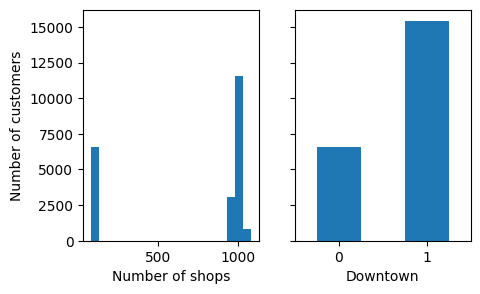

In [7]:
colinear_hists1, (ax1, ax2) = plt.subplots(1,2, sharey=True)
n1, bins1, patches1 = ax1.hist('Shops', bins=20, data=atm)
ax1.set_xlabel('Number of shops')
ax1.set_ylabel('Number of customers')
downtown_counts.plot(kind='bar')
ax2.set_xlabel('Downtown')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
plt.show()

In [8]:
testingDowntown['New_flag'] = np.where(testingDowntown['Shops'] < 500, 0, 1)
print(len(testingDowntown[testingDowntown['New_flag'] != testingDowntown['Downtown']]))

0


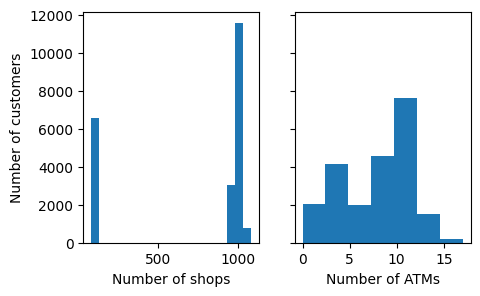

In [9]:
'''
So, we can get all the information contained in downtown from shops
Let's exclude downtown.
Now, ATMs and Shops are also highly correlated so let's look into atms
'''

colinear_hists2, (ax1, ax2) = plt.subplots(1,2, sharey=True)
n1, bins1, patches1 = ax1.hist('Shops', bins=20, data=atm)
ax1.set_xlabel('Number of shops')
ax1.set_ylabel('Number of customers')
n2, bins2, patches2 = ax2.hist('ATMs', bins=7, data=atm)
ax2.set_xlabel('Number of ATMs')
plt.show()

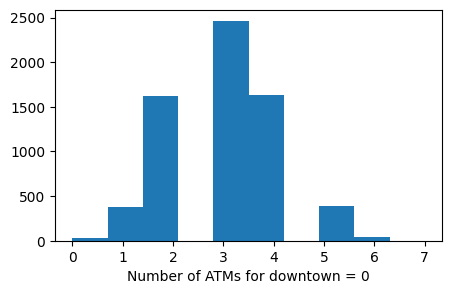

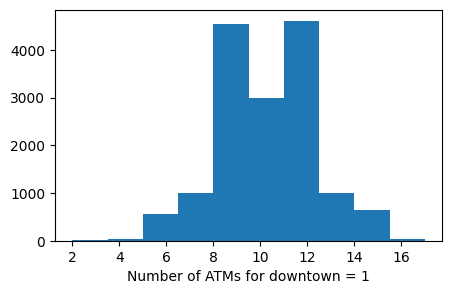

In [10]:
atms_by_downtown = atm.groupby('Downtown')

for key, group in atms_by_downtown:
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist('ATMs', data=group)
    ax.set_xlabel(f'Number of ATMs for downtown = {key}')

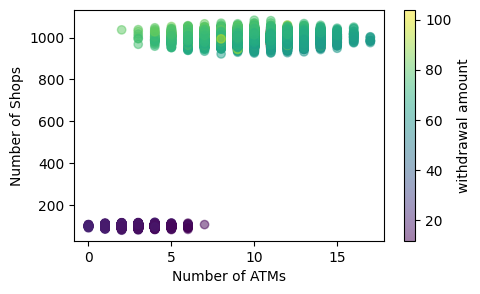

In [11]:
fig, ax = plt.subplots()
scatter_plt = ax.scatter(x='ATMs', y='Shops', data=atm, c='Withdraw', alpha=0.5)
ax.set_xlabel('Number of ATMs')
ax.set_ylabel('Number of Shops')
fig.colorbar(scatter_plt, label="withdrawal amount")
plt.show()

For downtown = 0


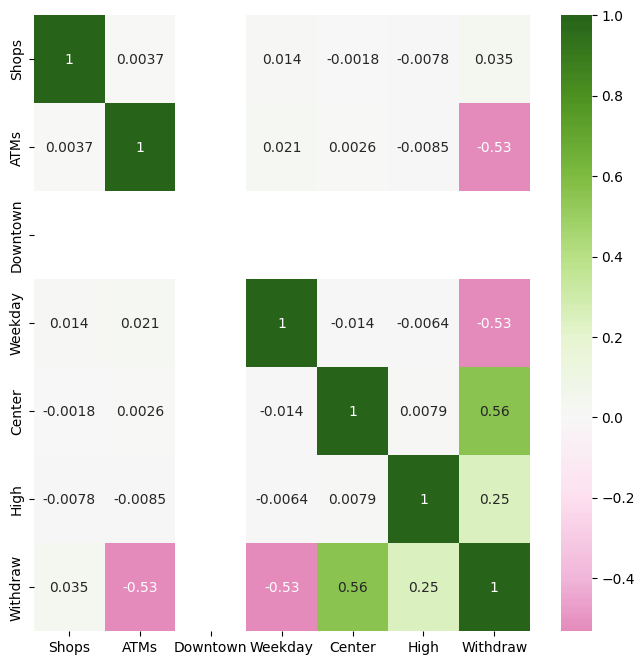

For downtown = 1


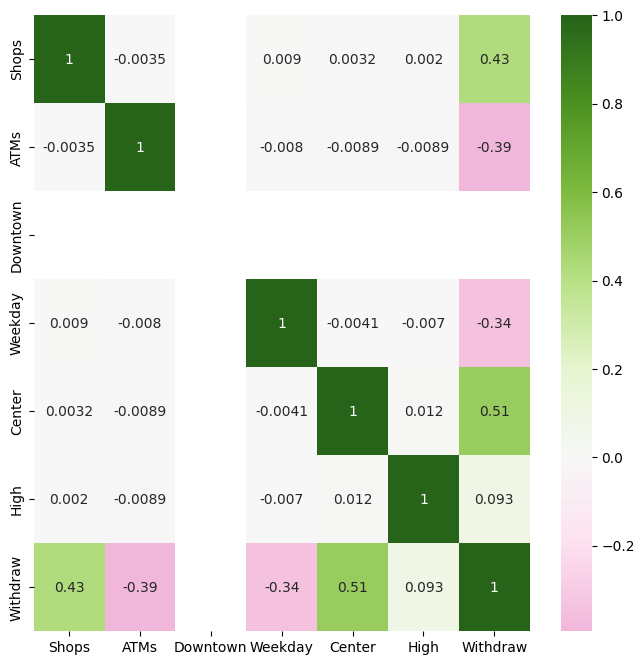

In [17]:
'''
So, it's pretty obvious that there are two groups, and we've seen that the flag downtown is just a manipulation of the number of shops
Let's see if anything effects different groups of downtown and maybe we could have a two-model approach
'''

for key, group in atms_by_downtown:
    print(f'For downtown = {key}')
    plt.figure(figsize=(8, 8)) 
    sns.heatmap(group.corr(),  cmap='PiYG', center=0, annot=True)
    plt.show()
    # fig, ax = plt.subplots()
    # scatter_plt = ax.scatter(x='ATMs', y='Shops', data=group, c='Withdraw', alpha=0.5)
    # ax.set_xlabel(f'Number of ATMs for downtown = {key}')
    # ax.set_ylabel(f'Number of Shops for downtown = {key}')
    # fig.colorbar(scatter_plt, label="withdrawal amount")

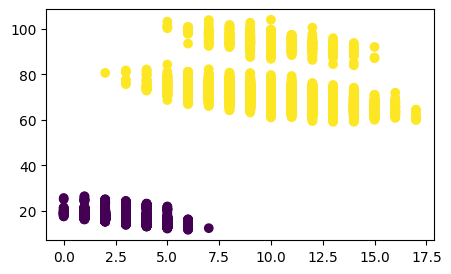

In [54]:
'''
So, we can see that we've gotten rid of our multicolinearity. Heuristic approach here followed by whatever method could be good.
'''
plt.scatter(x='ATMs',y='Withdraw',c='Downtown', data=atm)

   Shops  ATMs  Downtown  Weekday  Center  High   Withdraw  Downtown-Center  \
0   1018    10         1        0       0     0  72.750556             -2.0   
1    974    10         1        1       0     0  66.720482             -2.0   
2     96     2         0        0       0     1  19.189516              0.0   
3    958     9         1        1       0     1  67.388669             -2.0   
4    103     4         0        1       0     1  15.813127              0.0   

   Downtown-Weekday  Downtown-High  
0              -2.0           -2.0  
1              -1.0           -2.0  
2               0.0            1.0  
3              -1.0           -1.0  
4               1.0            1.0  


Text(0.5, 1.0, 'Coloured by Downtown-High')

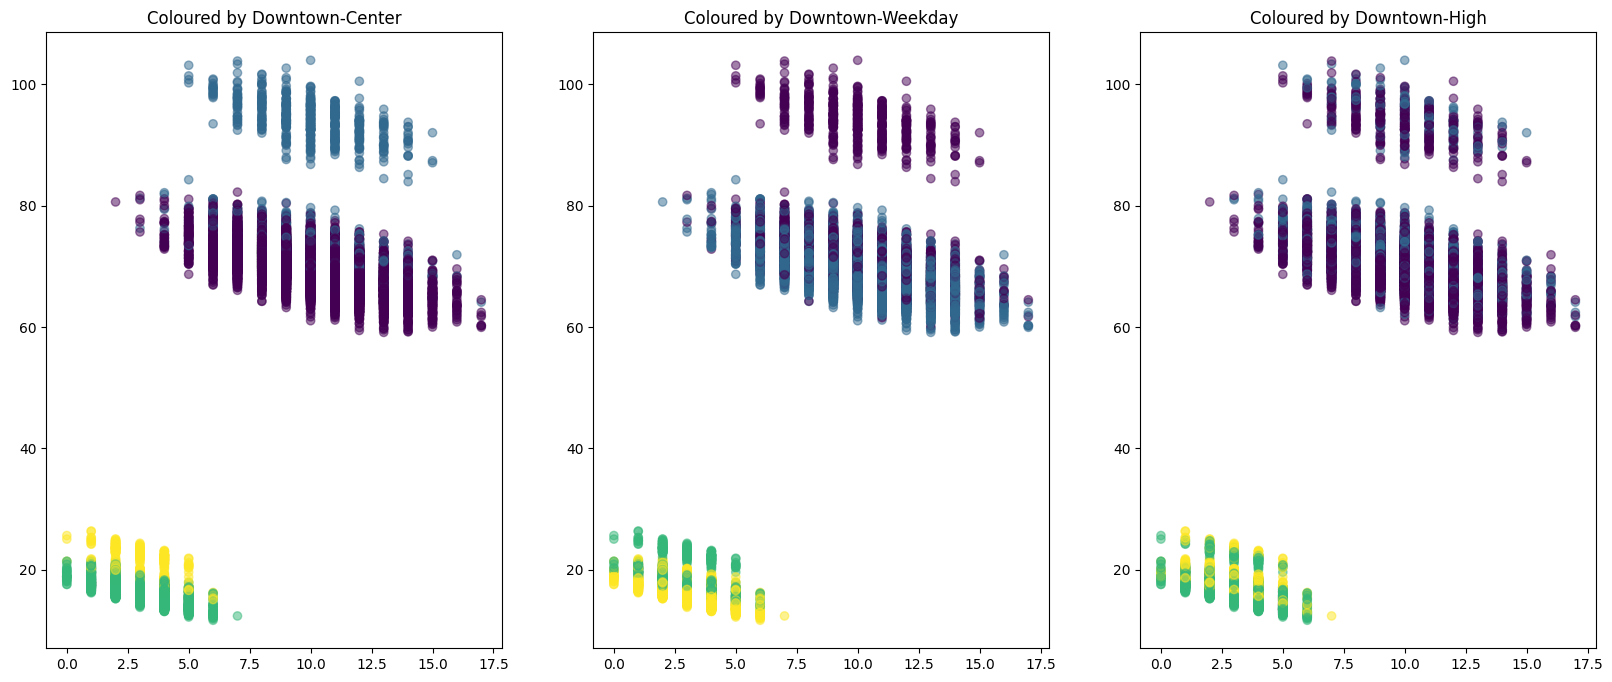

In [60]:
atm['Downtown-Center'] = atm.apply(lambda x: -2 * x.Downtown + x.Center, axis = 1)
atm['Downtown-Weekday'] = atm.apply(lambda x: -2 * x.Downtown + x.Weekday, axis = 1)
atm['Downtown-High'] = atm.apply(lambda x: -2 * x.Downtown + x.High, axis = 1)
print(atm.head())

plt.figure(figsize=(20, 8)) 
ax1, ax2, ax3 = plt.subplot(1,3,1), plt.subplot(1,3,2), plt.subplot(1,3,3)
ax1.scatter(x='ATMs',y='Withdraw',c='Downtown-Center', data=atm, alpha=0.5)
ax1.set_title('Coloured by Downtown-Center')
ax2.scatter(x='ATMs',y='Withdraw',c='Downtown-Weekday', data=atm, alpha=0.5)
ax2.set_title('Coloured by Downtown-Weekday')
ax3.scatter(x='ATMs',y='Withdraw',c='Downtown-High', data=atm, alpha=0.5)
ax3.set_title('Coloured by Downtown-High')